# GDA

In [1]:
import math

if __name__ == '__main__':
    learning_rate = 0.01
    for a in range(1, 100):
        cur = 0
        for i in range(1000):
            cur -= learning_rate * (cur ** 2 - a)
        print('{} 的平方根（近似）为：{}，真实值为：{}'.format(a, cur, math.sqrt(a)))

1 的平方根（近似）为：0.9999999965862503，真实值为：1.0
2 的平方根（近似）为：1.4142135623720964，真实值为：1.4142135623730951
3 的平方根（近似）为：1.732050807568874，真实值为：1.7320508075688772
4 的平方根（近似）为：1.9999999999999973，真实值为：2.0
5 的平方根（近似）为：2.236067977499785，真实值为：2.23606797749979
6 的平方根（近似）为：2.449489742783174，真实值为：2.449489742783178
7 的平方根（近似）为：2.6457513110645867，真实值为：2.6457513110645907
8 的平方根（近似）为：2.8284271247461863，真实值为：2.8284271247461903
9 的平方根（近似）为：2.9999999999999964，真实值为：3.0
10 的平方根（近似）为：3.162277660168376，真实值为：3.1622776601683795
11 的平方根（近似）为：3.3166247903553967，真实值为：3.3166247903554
12 的平方根（近似）为：3.4641016151377517，真实值为：3.4641016151377544
13 的平方根（近似）为：3.6055512754639865，真实值为：3.605551275463989
14 的平方根（近似）为：3.7416573867739387，真实值为：3.7416573867739413
15 的平方根（近似）为：3.8729833462074144，真实值为：3.872983346207417
16 的平方根（近似）为：3.9999999999999973，真实值为：4.0
17 的平方根（近似）为：4.123105625617655，真实值为：4.123105625617661
18 的平方根（近似）为：4.24264068711928，真实值为：4.242640687119285
19 的平方根（近似）为：4.358898943540669，真实值为：4.358898943540674
20 的平方根（近似）为：4.472135954

# Advertising

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


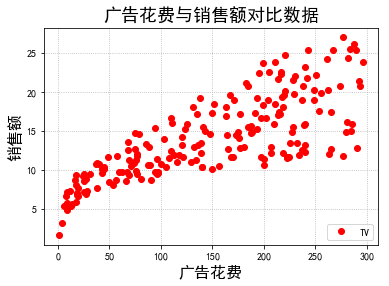

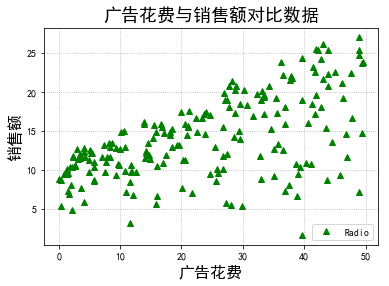

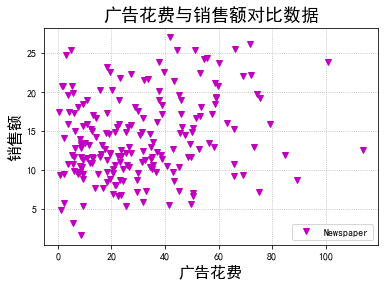

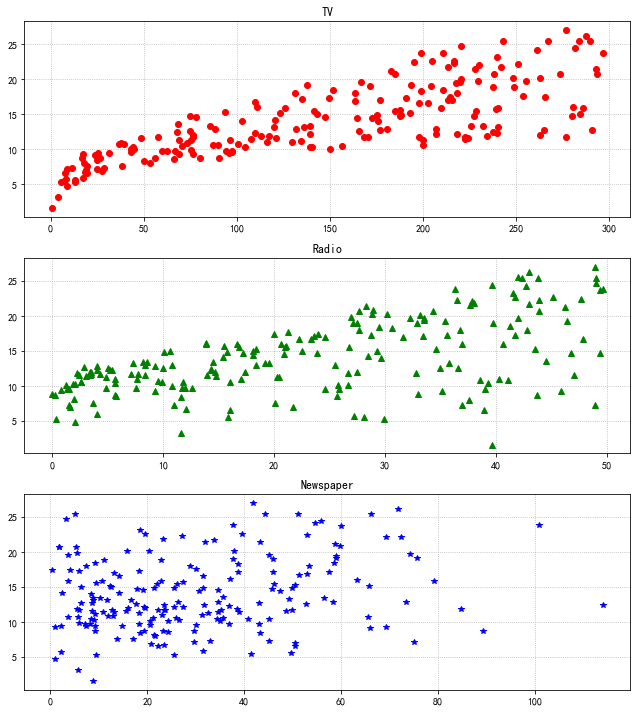


<class 'pandas.core.frame.DataFrame'>

(160, 3) (160,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[0.0468431  0.17854434 0.00258619] 2.907947020816433

MSE =  1.9918855518287906 RMSE =  1.4113417558581587
R2 =  0.8959372632325174
R2 =  0.8927605914615384


d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


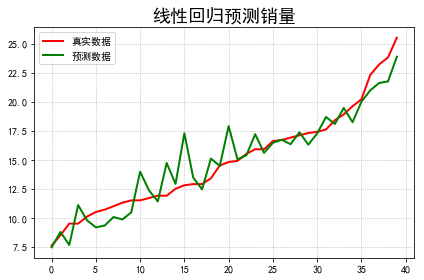

In [42]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # 划分数据集
from sklearn.linear_model import LinearRegression  # 线性回归
from pprint import pprint  # 格式化输出

path = './Advertising.csv'

# pandas 读入数据
data = pd.read_csv(path)  # 读入原始数据
x = data[['TV', 'Radio', 'Newspaper']]  # 读入需要的列：x，特征
y = data['Sales']  # 读入需要的列：y，标准结果
print(x.head())
print()
print(y.head())

# 解决绘图中文乱码问题
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

# 绘图1（分别绘制）
plt.figure(facecolor='w')  # 创建
plt.plot(data['TV'], y, 'ro', label='TV')  # 绘图
plt.legend(loc='lower right')  # 图例设置
plt.xlabel('广告花费', fontsize=16)  # 标签
plt.ylabel('销售额', fontsize=16)
plt.title('广告花费与销售额对比数据', fontsize=18)  # 标题
plt.grid(b=True, ls=':')  # 显示网格

plt.figure(facecolor='w')  # 创建
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.legend(loc='lower right')  
plt.xlabel('广告花费', fontsize=16)  
plt.ylabel('销售额', fontsize=16)
plt.title('广告花费与销售额对比数据', fontsize=18)
plt.grid(b=True, ls=':')  

plt.figure(facecolor='w')  
plt.plot(data['Newspaper'], y, 'mv', label='Newspaper')
plt.legend(loc='lower right') 
plt.xlabel('广告花费', fontsize=16)  
plt.ylabel('销售额', fontsize=16)
plt.title('广告花费与销售额对比数据', fontsize=18)
plt.grid(b=True, ls=':')  

plt.show()  # 显示图像

# 绘图2（组合在一起）
plt.figure(facecolor='w', figsize=(9, 10))  # 创建

plt.subplot(3, 1, 1)  # 3 行，1 列，在第 1 个位置绘制
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid(b=True, ls=':')

plt.subplot(3, 1, 2)  # 3 行，1 列，在第 2 个位置绘制
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid(b=True, ls=':')

plt.subplot(3, 1, 3)  # 3 行，1 列，在第 3 个位置绘制
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid(b=True, ls=':')

plt.tight_layout()  # 紧凑显示图片
plt.show()

print()

# 机器学习
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)  # 划分数据，训练集80%， 不随机划分
print(type(x_test))
print()
print(x_train.shape, y_train.shape)
print()
linreg = LinearRegression()  # 创建模型
model = linreg.fit(x_train, y_train)  # 训练模型
print(model)
print(linreg.coef_, linreg.intercept_)
print()

order = y_test.argsort(axis='index')   # 将 x 中的元素从小到大排序
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)
rmse = np.sqrt(mse)
print('MSE = ', mse, end=' ')
print('RMSE = ', rmse)
print('R2 = ', linreg.score(x_train, y_train))
print('R2 = ', linreg.score(x_test, y_test))

plt.figure(facecolor='w')
t = np.arange(len(x_test))
# plt.subplot(2, 1, 1)
plt.plot(t, y_test, 'r-', linewidth=2, label='真实数据')
# plt.legend(loc='upper left')
# plt.title('线性回归预测销量', fontsize=18)
# plt.grid(b=True, ls=':')
# plt.subplot(2, 1, 2)
plt.plot(t, y_hat, 'g-', linewidth=2, label='预测数据')
plt.legend(loc='upper left')
plt.title('线性回归预测销量', fontsize=18)
plt.grid(b=True, ls=':')
plt.tight_layout()
plt.show()